In [16]:
import pandas as pd
import numpy as np
from scipy.stats import skew, randint
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error,  r2_score

import joblib
import pickle
import io


In [2]:
df = pd.read_csv('Clean_dataset.csv')
df

,Store,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Week_Number,Day,Month,Year,Dept,Weekly_Sales
0,1,1,151315,42.31,2.572,38388.4128,4852.467,213.8109,36863.2271,6010.6891,211.096358,8.106,2,5,5,2,2010,1,24924.50
1,1,1,151315,42.31,2.572,38388.4128,4852.467,213.8109,36863.2271,6010.6891,211.096358,8.106,2,5,5,2,2010,2,50605.27
2,1,1,151315,42.31,2.572,38388.4128,4852.467,213.8109,36863.2271,6010.6891,211.096358,8.106,2,5,5,2,2010,3,13740.12
3,1,1,151315,42.31,2.572,38388.4128,4852.467,213.8109,36863.2271,6010.6891,211.096358,8.106,2,5,5,2,2010,4,39954.04
4,1,1,151315,42.31,2.572,38388.4128,4852.467,213.8109,36863.2271,6010.6891,211.096358,8.106,2,5,5,2,2010,5,32229.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,2,118221,58.85,3.882,4018.9100,58.080,100.0000,211.9400,858.3300,192.308899,8.667,2,43,26,10,2012,93,2487.80
421566,45,2,118221,58.85,3.882,4018.9100,58.080,100.0000,211.9400,858.3300,192.308899,8.667,2,43,26,10,2012,94,5203.31
421567,45,2,118221,58.85,3.882,4018.9100,58.080,100.0000,211.9400,858.3300,192.308899,8.667,2,43,26,10,2012,95,56017.47
421568,45,2,118221,58.85,3.882,4018.9100,58.080,100.0000,211.9400,858.3300,192.308899,8.667,2,43,26,10,2012,97,6817.48


In [3]:
df.isna().sum()

Store           0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
Week_Number     0
Day             0
Month           0
Year            0
Dept            0
Weekly_Sales    0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Type          421570 non-null  int64  
 2   Size          421570 non-null  int64  
 3   Temperature   421570 non-null  float64
 4   Fuel_Price    421570 non-null  float64
 5   MarkDown1     421570 non-null  float64
 6   MarkDown2     421570 non-null  float64
 7   MarkDown3     421570 non-null  float64
 8   MarkDown4     421570 non-null  float64
 9   MarkDown5     421570 non-null  float64
 10  CPI           421570 non-null  float64
 11  Unemployment  421570 non-null  float64
 12  IsHoliday     421570 non-null  int64  
 13  Week_Number   421570 non-null  int64  
 14  Day           421570 non-null  int64  
 15  Month         421570 non-null  int64  
 16  Year          421570 non-null  int64  
 17  Dept          421570 non-null  int64  
 18  Week

In [5]:
df.skew()

Store            0.077763
Type             0.693311
Size            -0.325850
Temperature     -0.321404
Fuel_Price      -0.104901
MarkDown1        2.775492
MarkDown2        6.614966
MarkDown3       10.913816
MarkDown4        4.173103
MarkDown5        7.419979
CPI              0.085219
Unemployment     1.183743
IsHoliday       -3.359867
Week_Number      0.052659
Day              0.009423
Month            0.040786
Year             0.056236
Dept             0.358223
Weekly_Sales     3.262008
dtype: float64

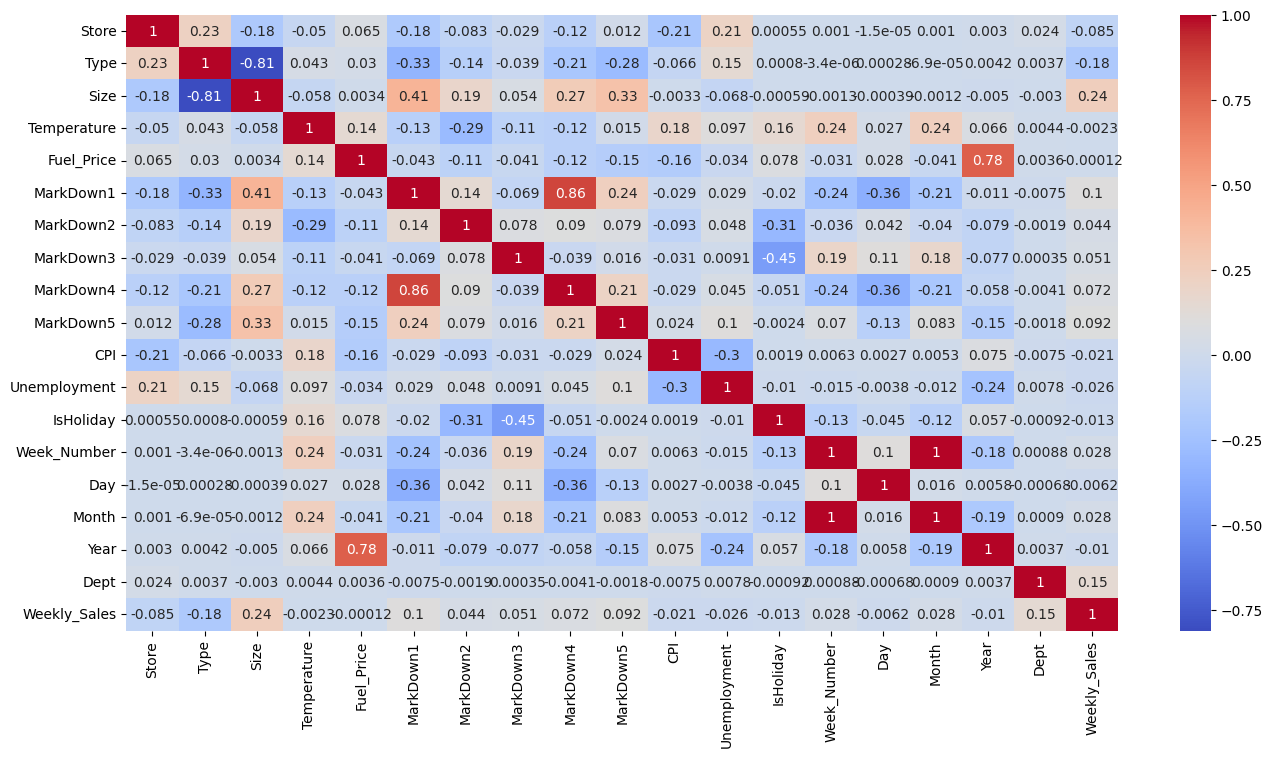

In [6]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(), annot=True, cmap = 'coolwarm')
plt.show()

In [7]:
df

,Store,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Week_Number,Day,Month,Year,Dept,Weekly_Sales
0,1,1,151315,42.31,2.572,38388.4128,4852.467,213.8109,36863.2271,6010.6891,211.096358,8.106,2,5,5,2,2010,1,24924.50
1,1,1,151315,42.31,2.572,38388.4128,4852.467,213.8109,36863.2271,6010.6891,211.096358,8.106,2,5,5,2,2010,2,50605.27
2,1,1,151315,42.31,2.572,38388.4128,4852.467,213.8109,36863.2271,6010.6891,211.096358,8.106,2,5,5,2,2010,3,13740.12
3,1,1,151315,42.31,2.572,38388.4128,4852.467,213.8109,36863.2271,6010.6891,211.096358,8.106,2,5,5,2,2010,4,39954.04
4,1,1,151315,42.31,2.572,38388.4128,4852.467,213.8109,36863.2271,6010.6891,211.096358,8.106,2,5,5,2,2010,5,32229.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,2,118221,58.85,3.882,4018.9100,58.080,100.0000,211.9400,858.3300,192.308899,8.667,2,43,26,10,2012,93,2487.80
421566,45,2,118221,58.85,3.882,4018.9100,58.080,100.0000,211.9400,858.3300,192.308899,8.667,2,43,26,10,2012,94,5203.31
421567,45,2,118221,58.85,3.882,4018.9100,58.080,100.0000,211.9400,858.3300,192.308899,8.667,2,43,26,10,2012,95,56017.47
421568,45,2,118221,58.85,3.882,4018.9100,58.080,100.0000,211.9400,858.3300,192.308899,8.667,2,43,26,10,2012,97,6817.48


In [8]:
Y = df['Weekly_Sales']
X = df.drop('Weekly_Sales',axis=1)

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model = rf_regressor.fit(X_train, Y_train)

Y_train_pred = rf_model.predict(X_train)

Y_test_pred = rf_model.predict(X_test)

train_mse = mean_squared_error(Y_train, Y_train_pred)
test_mse = mean_squared_error(Y_test, Y_test_pred)

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

train_mae = mean_absolute_error(Y_train, Y_train_pred)
test_mae = mean_absolute_error(Y_test, Y_test_pred)

train_r2 = r2_score(Y_train, Y_train_pred)
test_r2 = r2_score(Y_test, Y_test_pred)

print(f'Train Mean Squared Error: {train_mse}')
print(f'Test Mean Squared Error: {test_mse}')

print(f'Train Root Mean Squared Error: {train_rmse}')
print(f'Test Root Mean Squared Error: {test_rmse}')

print(f'Train Mean Absolute Error: {train_mae}')
print(f'Test Mean Absolute Error: {test_mae}')

print(f'Train R2 Score: {train_r2}')
print(f'Test R2 Score: {test_r2}')

Train Mean Squared Error: 1843437.053267253
Test Mean Squared Error: 12024034.409810945
Train Root Mean Squared Error: 1357.732320182168
Test Root Mean Squared Error: 3467.5689480976357
Train Mean Absolute Error: 514.088150567818
Test Mean Absolute Error: 1383.1761875524824
Train R2 Score: 0.9964117509536207
Test R2 Score: 0.9770532092736732


In [10]:
rf_model1 = RandomForestRegressor(max_depth=40, max_features='log2', min_samples_split=19,
                                  n_estimators=127).fit(X_train, Y_train)

Y_test_pred = rf_model1.predict(X_test)
Y_train_pred = rf_model1.predict(X_train)

error ={ 'Train_Mean_Square_Error': mean_squared_error(Y_train, Y_train_pred),
        'Test_Mean_Square_Error': mean_squared_error(Y_test, Y_test_pred),
        'Train_Root_Mean_Square_Error': np.sqrt(mean_squared_error(Y_train, Y_train_pred)),
        'Test_Root_Mean_Square_Error': np.sqrt(mean_squared_error(Y_test, Y_test_pred)),
        'Train_Mean_Absolute_Error': mean_absolute_error(Y_train, Y_train_pred),
        'Test_Mean_Absolute_Error': mean_absolute_error(Y_test, Y_test_pred),
        'Train_R2_Score': r2_score(Y_train, Y_train_pred ),
        'Test_R2_Score': r2_score(Y_test, Y_test_pred)}
error

{'Train_Mean_Square_Error': 98540721.82139392,
 'Test_Mean_Square_Error': 136937905.38752997,
 'Train_Root_Mean_Square_Error': 9926.767944371115,
 'Test_Root_Mean_Square_Error': 11702.047059704126,
 'Train_Mean_Absolute_Error': 6131.235573689195,
 'Test_Mean_Absolute_Error': 7215.61627254366,
 'Train_R2_Score': 0.8081905479341108,
 'Test_R2_Score': 0.7386662953271942}

In [11]:

data = np.array([[18, 41, 95, 120653, 36.33, 3.727, 1692.83, 1.5, 7837.15, 579.46, 449.15, 0, 47.1, 3.0, 138.424, 8.243, 23.0, 11]])

predicted_weekly_sales = rf_model.predict(data)

print('Predicted Weekly Sales Price: $', predicted_weekly_sales[0])


Predicted Weekly Sales Price: $ 3317.1008


In [12]:
with open('Model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

In [17]:
with open('Model.pkl', 'rb') as file:
    buffer = io.BufferedReader(file)
    reg_model = pickle.load(buffer)

MemoryError: could not allocate 27186880 bytes

In [ ]:
print('Predicted Weekly Sales Price: $', reg_model.predict(data)[0])

Predicted Weekly Sales Price: $ 3317.1008


In [18]:
import joblib

joblib.dump(rf_model, 'model.joblib.gz', compress=('gzip', 3))

['model.joblib.gz']

In [ ]:
finel_model = joblib.load('model.joblib.gz')

In [ ]:

data = np.array([[18, 41, 95, 120653, 36.33, 3.727, 1692.83, 1.5, 7837.15, 579.46, 449.15, 0, 47.1, 3.0, 138.424, 8.243, 23.0, 11]])

predicted_weekly_sales = finel_model.predict(data)

print('Predicted Weekly Sales Price: $', predicted_weekly_sales[0])


Predicted Weekly Sales Price: $ 3317.1008
